This pipeline helps in iterative incremental prediction of using features by import
4 datasets of ranked features were evaluted
1.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap 
import numpy as np

Install scikit-learn

In [2]:
data = pd.read_csv("Data/All_data.csv")


Dataset

In [3]:
df_HFR_NO_FE=df_HFR_combined=pd.read_csv("Data/All_data.csv")
df_HFR_combined=pd.read_csv("Data/hmf_ranked.csv") #ranked features by HMF
df_HFR_mi=pd.read_csv("Data/mi_ranked_data.csv")    #Rnaked feeatures by mutual information
df_HFR_F=pd.read_csv("Data/f_regression_ranked_data.csv")#Ranked feeatures by f regression
df_HFR_cost=pd.read_csv("Data/cost_ranked_data.csv")


#Adding the yield column

In [4]:
df_HFR_NO_FE["Yield"]=data['Yield']

In [5]:
df_HFR_combined["Yield"]=data['Yield']

In [6]:
df_HFR_mi["Yield"]=data['Yield']

In [7]:
df_HFR_F["Yield"]=data['Yield']

In [8]:
df_HFR_cost["Yield"]=data['Yield']

Datatypes

Encoding

In [9]:
ec=LabelEncoder()


In [10]:
df_HFR_NO_FE["CRP"]=ec.fit_transform(df_HFR_NO_FE["CRP"])

In [11]:
df_HFR_combined["CRP"]=ec.fit_transform(df_HFR_combined["CRP"])

In [12]:
df_HFR_mi["CRP"]=ec.fit_transform(df_HFR_mi["CRP"])

In [13]:
df_HFR_F["CRP"]=ec.fit_transform(df_HFR_F["CRP"])

In [14]:
df_HFR_cost["CRP"]=ec.fit_transform(df_HFR_cost["CRP"])

Define features columns and Target Variable

In [15]:
#X=df_HFR.drop(["Yield"],axis=1)
Y=df_HFR_NO_FE["Yield"]

In [16]:
X_df_HFR_NO_FE=df_HFR_NO_FE.drop(columns=['District', 'Center','preciptype','VIS',"Yield"],axis=1)

In [17]:
X_df_HFR_combined=df_HFR_combined.drop(["Yield"],axis=1)

In [18]:
X_df_HFR_mi=df_HFR_mi.drop(["Yield"],axis=1)

In [19]:
X_df_HFR_F=df_HFR_F.drop(["Yield"],axis=1)

In [20]:
X_df_HFR_cost=df_HFR_cost.drop(columns=['preciptype','VIS',"Yield"],axis=1)

In [21]:
#X2=(X.iloc[:,0:19])

In [22]:
#X1=X.drop("TN",axis=1)

In [23]:
X1_df_HFR_NO_FE=X_df_HFR_NO_FE.iloc[:,0:49]

In [24]:
X1_df_HFR_combined=X_df_HFR_combined.iloc[:,0:50]

In [25]:
X1_df_HFR_mi=X_df_HFR_mi.iloc[:,0:50]

In [26]:
X1_df_HFR_F=X_df_HFR_F.iloc[:,0:50]

In [27]:
X1_df_HFR_cost=X_df_HFR_cost.iloc[:,0:50]

In [28]:
#X1_df_HFR_NO_FE

In [29]:
#X1_df_HFR_combined

In [30]:
#X1_df_HFR_mi

In [31]:
#X1_df_HFR_F

In [32]:
#X1_df_HFR_cost

Predicting using features identified by five methods:

In [33]:
#X1=df_HFR[["SLT","N","TN","CLY","LAT","ST10","BDN","CEC","P","MAP","ELV","ST04","CRP","K","MON","WDIR"]]

Predicting using fetaures Identified by SHAP

In [34]:
#X1=data[["N","ST01","K","P","T0","LAT","CRP","BDN","CLY","WGST","MAP","WDIR","SLT","ELV","CLDC","S04","CEC","ST10","SMV10","WSPD"]]

In [35]:
#X1["CRP"]=ec.fit_transform(X1["CRP"])

Prediting using features idenfified by LIME

In [36]:
#X1=data[["N", "WGST", "BDN", "ST01", "LONG", "K", "WDIR", "DEW", "T0", "SND", "P", "ELV", "MAP", "ST10", "FL", "LAT", "CLDC", "WSPD", "ST20", "SM01"]]

Split the dataset

In [37]:
X1_df_HFR_NO_FE_train,X1_df_HFR_NO_FE_test,Y_train,Y_test=train_test_split(X1_df_HFR_NO_FE,Y,test_size=.3,random_state=0)

In [38]:
X1_df_HFR_combined,X1_df_HFR_combined_test,Y_train,Y_test=train_test_split(X1_df_HFR_combined,Y,test_size=.3,random_state=0)

In [39]:
X1_df_HFR_mi_train,X1_df_HFR_mi_test,Y_train,Y_test=train_test_split(X1_df_HFR_mi,Y,test_size=.3,random_state=0)

In [40]:
X1_df_HFR_F_train,X1_df_HFR_F_test,Y_train,Y_test=train_test_split(X1_df_HFR_F,Y,test_size=.3,random_state=0)

In [41]:
X1_df_HFR_cost_train,X1_df_HFR_cost_test,Y_train,Y_test=train_test_split(X1_df_HFR_cost,Y,test_size=.3,random_state=0)

Making prediction with Random forest and different feattures

In [42]:
RF=RandomForestRegressor(n_estimators=100,random_state=0)
Model1_df_HFR_NO_FE=RF.fit(X1_df_HFR_NO_FE_train,Y_train)
Y_Pred_df_HFR_NO_FE=Model1_df_HFR_NO_FE.predict(X1_df_HFR_NO_FE_test)

In [43]:
RF=RandomForestRegressor(n_estimators=100,random_state=0)
Model1_df_HFR_combined=RF.fit(X1_df_HFR_combined,Y_train)
Y_Pred_df_HFR_combined=Model1_df_HFR_combined.predict(X1_df_HFR_combined_test)

In [44]:
RF=RandomForestRegressor(n_estimators=100,random_state=0)
Model1_df_HFR_mi=RF.fit(X1_df_HFR_mi_train,Y_train)
Y_Pred_df_HFR_mi=Model1_df_HFR_mi.predict(X1_df_HFR_mi_test)

In [45]:
RF=RandomForestRegressor(n_estimators=100,random_state=0)
Model1_df_HFR_F=RF.fit(X1_df_HFR_F_train,Y_train)
Y_Pred_df_HFR_F=Model1_df_HFR_F.predict(X1_df_HFR_F_test)

In [46]:
RF=RandomForestRegressor(n_estimators=100,random_state=0)
Model1_df_HFR_cost=RF.fit(X1_df_HFR_cost_train,Y_train)
Y_Pred_df_HFR_cost=Model1_df_HFR_cost.predict(X1_df_HFR_cost_test)

Evaluating the model

In [47]:
mse_df_HFR_NO_FE=mean_squared_error(Y_test,Y_Pred_df_HFR_NO_FE)
r2_df_HFR_NO_FE=r2_score(Y_test,Y_Pred_df_HFR_NO_FE)

In [48]:
mse_df_HFR_combined=mean_squared_error(Y_test,Y_Pred_df_HFR_combined)
r2_df_HFR_combined=r2_score(Y_test,Y_Pred_df_HFR_combined)

In [49]:
mse_df_HFR_mi=mean_squared_error(Y_test,Y_Pred_df_HFR_mi)
r2_df_HFR_mi=r2_score(Y_test,Y_Pred_df_HFR_mi)

In [50]:
mse_df_HFR_F=mean_squared_error(Y_test,Y_Pred_df_HFR_F)
r2_df_HFR_F=r2_score(Y_test,Y_Pred_df_HFR_F)

In [51]:
mse_df_HFR_cost=mean_squared_error(Y_test,Y_Pred_df_HFR_cost)
r2_df_HFR_cost=r2_score(Y_test,Y_Pred_df_HFR_cost)

Error MSE

In [52]:
print("mse_df_HFR_NO_FE",mse_df_HFR_NO_FE)
#r2

mse_df_HFR_NO_FE 1.3670766833059364e-12


In [53]:
print("mse_df_HFR_combined:",mse_df_HFR_combined)

mse_df_HFR_combined: 1.3274701253583365e-12


In [54]:
print("mse_df_HFR_mi:",mse_df_HFR_mi)

mse_df_HFR_mi: 1.3639988587973544e-12


In [55]:
print("mse_df_HFR_F:",mse_df_HFR_F)

mse_df_HFR_F: 1.3915596226737237e-12


In [56]:
print("mse_df_HFR_cost:",mse_df_HFR_cost)

mse_df_HFR_cost: 1.3571377638054495e-12


COFFICIENT r2

In [57]:
print("r2_df_HFR_NO_FE:",r2_df_HFR_NO_FE)

r2_df_HFR_NO_FE: 0.8861402120909857


In [58]:
print("r2_df_HFR_combined:",r2_df_HFR_combined)

r2_df_HFR_combined: 0.8894389255741346


In [59]:
print("r2_df_HFR_mi:",r2_df_HFR_mi)

r2_df_HFR_mi: 0.8863965550233521


In [60]:
print("r2_df_HFR_F:",r2_df_HFR_F)

r2_df_HFR_F: 0.8841011002270746


In [61]:
print("r2_df_HFR_cost:",r2_df_HFR_cost)

r2_df_HFR_cost: 0.8869679954042331


Plotting the accumlated evaluation score

In [62]:
#pip install shap

In [63]:
#Model explanantion by SHAP

In [64]:
import shap

In [65]:
#HAP Explainer based  trained model(ALL FEATURES)
explainer = shap.TreeExplainer(Model1_df_HFR_NO_FE)

In [66]:
#SHAP values 
#shap_values = explainer.shap_values(X1_df_HFR_NO_FE_test)
explainer = shap.TreeExplainer(Model1_df_HFR_NO_FE)
shap_values = explainer.shap_values(X1_df_HFR_NO_FE_train)

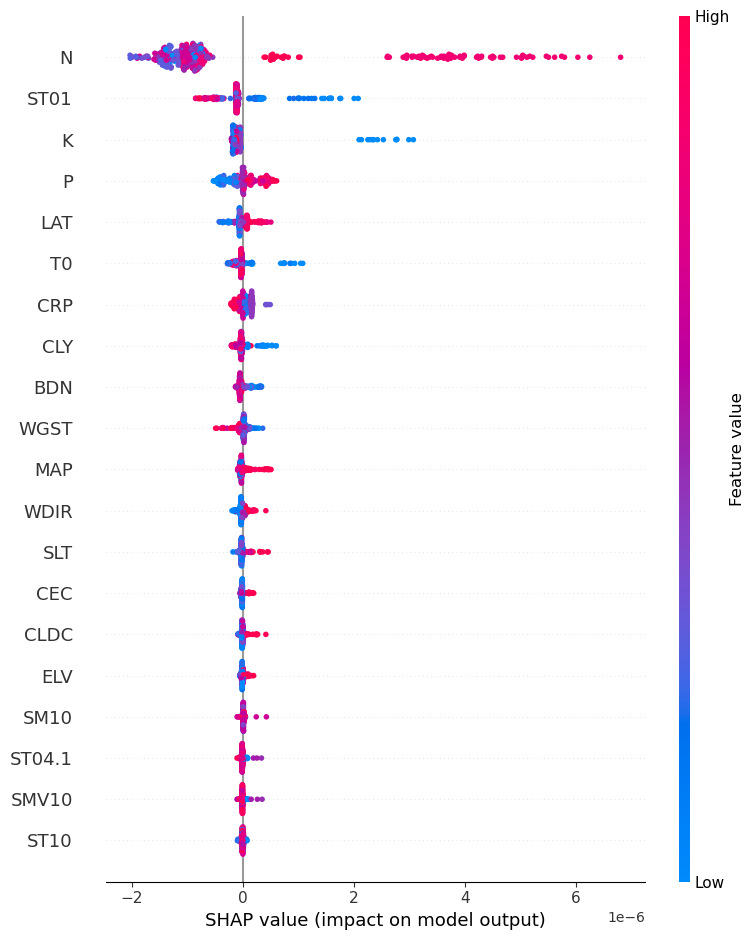

In [67]:
#Visualize SHAP explanations
shap.summary_plot(shap_values, X1_df_HFR_NO_FE_train)

In [71]:
import shap
import matplotlib.pyplot as plt

shap.summary_plot(shap_values, X1_df_HFR_NO_FE_train)
fig = plt.gcf()
fig.set_size_inches(6.85, 3.5)
fig.savefig("Fig7.pdf", format="pdf", bbox_inches="tight")
fig.savefig("Fig7.pdf", format="pdf", bbox_inches="tight")
fig.savefig("Fig6.jpeg", format="pdf", bbox_inches="tight")
plt.close()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\shap\plots\_beeswarm.py:1155: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


In [158]:
#LIME EXPLANATION

Fig.7 LIME Explanantion

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_tabular
from matplotlib import rcParams

# Springer-compliant font setup
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 10
rcParams['axes.labelsize'] = 10
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['axes.titlesize'] = 10  # Even if not used

# LIME explainer setup
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X1_df_HFR_NO_FE_train),
    feature_names=X1_df_HFR_NO_FE_train.columns.tolist(),
    class_names=['prediction'],
    mode='regression'
)

# Select one instance to explain
instance_to_explain = X1_df_HFR_NO_FE_train.iloc[49]

# Get explanation
explanation = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=Model1_df_HFR_NO_FE.predict,
    num_features=len(X1_df_HFR_NO_FE_train.columns)
)

# Extract top 20 features by importance
feature_importance = explanation.as_list()
top_20 = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)[:20]
names = [name for name, _ in top_20]
values = [value for _, value in top_20]
colors = ['green' if val > 0 else 'red' for val in values]

# Plot — clean, 1-column width (Springer), no title
plt.figure(figsize=(6.85, 3.5))  # 84 mm width ~ Springer single column
plt.barh(names, values, color=colors)
plt.xlabel('LIME value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', linewidth=0.5)

# Save in Springer-friendly formats
plt.tight_layout()
plt.savefig("Fig8x.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.savefig("Fig8x.eps", format="eps", dpi=300, bbox_inches="tight")
plt.savefig("Fig7.jpeg", format="jpeg", dpi=300, bbox_inches="tight")
plt.close()


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

Flowchart

Figure1 Flowcharchat

In [79]:
from graphviz import Digraph
from IPython.display import Image, display

# Create a new Digraph for the full process
full_flowchart = Digraph(format="pdf")
full_flowchart.attr(rankdir="TB", size="12", bgcolor="white",fontname="Arial", fontsize="10")

# === Phase 1: Model Selection ===
full_flowchart.node("A", "Features subsets", shape="ellipse", style="filled", fillcolor="lightgray")

# Feature Subsets
full_flowchart.node("B1", "All Features Subset", shape="box")
full_flowchart.node("B2", "Subsets of x Features ", shape="box")
#full_flowchart.node("B3", "Subsets of 10 Features", shape="box")

# Models
full_flowchart.node("C", "Candidate Models:\nSVR, PLS, GB, RF, ANN", shape="ellipse", style="filled", fillcolor="lightblue")

# Training and Evaluation
full_flowchart.node("D", "Train & Evaluate on Each Subset", shape="box")
full_flowchart.node("E", "Track R² & MSE", shape="box")
full_flowchart.node("F", "Compare Model Performance", shape="box")
full_flowchart.node("G", "Select Best Model", shape="parallelogram", style="filled", fillcolor="lightgreen")

# Connections for Phase 1
full_flowchart.edge("A", "B1")
full_flowchart.edge("A", "B2")
#full_flowchart.edge("A", "B3")
full_flowchart.edge("B1", "C")
full_flowchart.edge("B2", "C")
#full_flowchart.edge("B3", "C")
full_flowchart.edge("C", "D")
full_flowchart.edge("D", "E")
full_flowchart.edge("E", "F")
full_flowchart.edge("F", "G")

# === Phase 2: Feature Evaluation using Best Model ===
full_flowchart.node("H", "Sort by Scores(MI, FR, HMF, Cost-Based)", shape="ellipse", style="filled", fillcolor="lightyellow")
full_flowchart.node("I", "Incremental Feature Addition", shape="ellipse", style="filled", fillcolor="lightgreen")
full_flowchart.node("J", "Train Best Model", shape="box")
full_flowchart.node("K", "Evaluate MSE & R²", shape="box")
full_flowchart.node("L", "Track Metrics", shape="ellipse", style="filled", fillcolor="yellow")
full_flowchart.node("M1", "Subset of Features", shape="box")
full_flowchart.node("M2", "MSE and R² Scores", shape="box")
full_flowchart.node("N", "Identify Performing Zone", shape="ellipse", style="filled", fillcolor="orange")
full_flowchart.node("O", "Compare Extraction Methods", shape="box")
full_flowchart.node("P", "Select Best Extraction Method", shape="parallelogram", style="filled", fillcolor="lightcoral")
full_flowchart.node("Q", "Final Output: Critical and Cost-Effective Features Subset", shape="parallelogram", style="filled", fillcolor="lightgray")

# Connections for Phase 2
#full_flowchart.edge("G", "H")
full_flowchart.edge("H", "I")
full_flowchart.edge("I", "J")
full_flowchart.edge("J", "K")
full_flowchart.edge("K", "I", label="Iterate")
full_flowchart.edge("I", "L")
full_flowchart.edge("L", "M1")
full_flowchart.edge("L", "M2")
full_flowchart.edge("L", "N")
full_flowchart.edge("N", "O")
full_flowchart.edge("O", "P")
full_flowchart.edge("P", "Q")

# Render and display the full flowchart
full_flowchart.render("Fig1")
#display(Image(filename="full_feature_selection_flowchart.pdf"))

'Fig1.pdf'